# Chapter 3 - Linear Model Estimation

Joshua French

<a href="https://colab.research.google.com/github/jfrench/LinearRegression/blob/master/notebooks/03-linear-model-estimation-notebook.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg">
</a>

In [ ]:
if(!require(palmerpenguins, quietly = TRUE)) {
  install.packages("palmerpenguins", repos = "https://cran.rstudio.com/")
  library(palmerpenguins)
}
if(!require(ggplot2, quietly = TRUE)) {
  install.packages("ggplot2", repos = "https://cran.rstudio.com/")
  library(ggplot2)
}

# A simple motivating example

Suppose you observe data related to the heights of 5 mothers and their
adult daughters. The data are in the table below.

| observation | mother | daughter |
|------------:|-------:|---------:|
|           1 |   57.5 |     61.5 |
|           2 |   60.5 |     63.5 |
|           3 |   63.5 |     63.5 |
|           4 |   66.5 |     66.5 |
|           5 |   69.5 |     66.5 |

Would it be reasonable to use a mother’s height to predict the height of
her adult daughter? Consider the plot below.

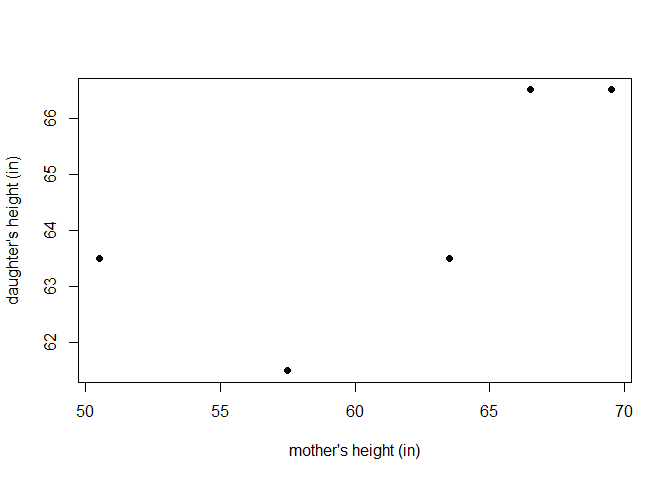

In [ ]:
x <- c(57.5, 50.5, 63.5, 66.5, 69.5) # mothers' heights
y <- c(61.5, 63.5, 63.5, 66.5, 66.5) # daughters' heights
plot(y ~ x, pch = 19, xlab = "mother's height (in)", ylab = "daughter's height (in)")

A **regression analysis** is the process of building a model describing
the typical relationship between a set of observed variables.

In the present context, we want to model the height of adult daughters
using their height of their mothers. The model we build is known as a
**regression model**.

The variables in a regression analysis may be divided into two types:

-   The response variable.
-   The predictor variables.

The outcome variable we are trying to predict is known as the **response
variable**.

-   Response variables are also known as **outcome**, **output**, or
    **dependent** variables.
-   The response variable is denoted by $Y$.

The variables available to model the response variable are known as
**predictors variables**:

-   They are also called **explanatory**, **regressor**, **input**,
    **dependent** variables or simply as **features**.
-   Following the convention of Weisberg (2014), we use the term
    **regressor** to refer to the variables used in our regression
    model, whether that is the original predictor variable, some
    transformation of a predictor, some combination of predictors, etc.
-   Every predictor can be a regressor but not all regressors are a
    predictor.
-   The regressor variables are denoted as $X_1, X_2, \ldots, X_{p-1}$.

A regression analysis assumes:

-   We have observed variables $X_1, X_2, \ldots, X_{p-1}$ and $Y$ for
    each of $n$ subjects from some population.
-   $x_{i,j}$ denotes the value of $X_j$ for observation $i$.
-   $Y_i$ denotes the value of $Y$ for observation $i$.
-   If there is only a single regressor, we can denote the single
    regressor as $X$ and the observed values of $X$ as
    $x_1, x_2, \ldots, x_n$.

For the height data, the 5 pairs of observed data are denoted
$$(x_1, Y_1), (x_2, Y_2), \ldots, (x_5, Y_5),$$ with $(x_i, Y_i)$
denoting the data for observation $i$.

-   $x_i$ denotes the mother’s height for observation $i$.
-   $Y_i$ denotes the daughter’s height for observation $i$.

Suppose we want to find the straight line that best fits the plot of
mother and daughter heights.

How do we determine the “best fitting” model?

Consider these potential “best fitting” lines which are drawn on the
scatter plot of the height data. Which one is best?

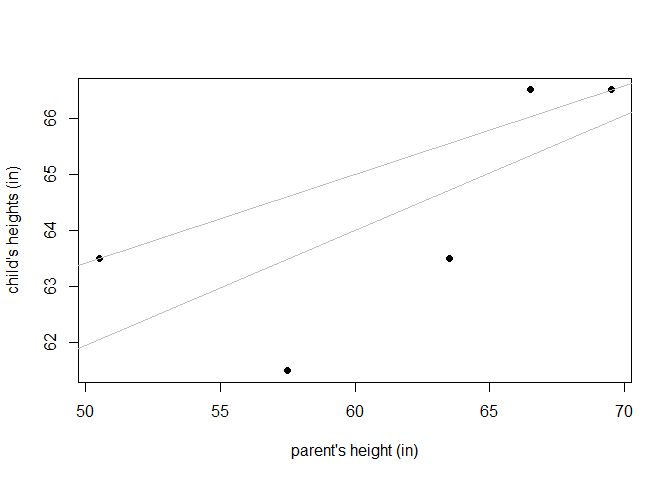

# Estimation of the simple linear regression model

**Parameter estimation** is the process of using observed data to
estimate values for the regression coefficients.

There are many different methods of parameter estimation in statistics:

-   Method-of-moments.
-   Maximum likelihood.
-   Bayesian.
-   Etc.

The most common parameter estimation method for linear models is the
**least squares method**, which is commonly called **Ordinary Least
Squares (OLS)** estimation.

OLS estimation estimates the regression coefficients with the values
that minimize the residual sum of squares (RSS), which we will define
shortly.

## Model definition, fitted values, residuals, and RSS

The regression model for $Y$ as a function of $X$, denoted
$E(Y \mid X)$, is the expected value of $Y$ conditional on the regressor
$X$.

The **simple linear regression model** for a response variable assumes
the mean of $Y$ conditional on a single regressor $X$ is $$
E(Y\mid X) = \beta_0 + \beta_1 X.
$$

The response variable $Y$ is modeled as $$
\begin{aligned}
Y &= E(Y \mid X) + \epsilon \\
&= \beta_0 + \beta_1 X + \epsilon,
\end{aligned}
(\#eq:slr-model-Y)
$$ where $\epsilon$ is known as the model error.

The error term $\epsilon$ is literally the deviation of the response
variable from its mean.

-   We typically assume that conditional on the regressor variable, the
    error term has mean 0 and variance $\sigma^2$.
-   This is written as $$
    E(\epsilon \mid X) = 0
    $$ and $$
    \mathrm{var}(\epsilon \mid X) = \sigma^2.
    $$

The observed data are modeled as $$
\begin{aligned}
Y_i &= \beta_0 + \beta_1 x_i + \epsilon \\
&= E(Y\mid X = x_i) + \epsilon_i,
\end{aligned}
$$ for $i=1$, $2$,$\ldots$,$n$, where $\epsilon_i$ denotes the error for
observation $i$.

The **estimated regression model** is defined as $$
\hat{E}(Y|X) = \hat{\beta}_0 + \hat{\beta}_1 X,
$$ where $\hat{\beta}_j$ denotes the estimated value of $\beta_j$ for
$j=0,1$.

The $i$th **fitted value** is defined as $$
\hat{Y}_i = \hat{E}(Y|X = x_i) = \hat{\beta}_0 + \hat{\beta}_1 x_i. $$

-   The $i$th fitted value is the estimated mean of $Y$ when the
    regressor $X=x_i$.

The $i$th **residual** is defined as $$
\hat{\epsilon}_i = Y_i - \hat{Y}_i. (\#eq:def-residual-slr)
$$

-   The $i$th residual is the difference between the response and
    estimated mean response of observation $i$.

The **residual sum of squares (RSS)** of a regression model is the sum
of its squared residuals. The RSS for a simple linear regression model,
as a function of the estimated regression coefficients $\hat{\beta}_0$
and $\hat{\beta}_1$, is defined as $$
RSS(\hat{\beta}_0, \hat{\beta}_1) = \sum_{i=1}^n \hat{\epsilon}_i^2. (\#eq:def-rss-slr)
$$

Using the various objects defined above, there are many equivalent
expressions for the RSS.

$$
\begin{aligned}
RSS(\hat{\beta}_0, \hat{\beta}_1) &= \sum_{i=1}^n \hat{\epsilon}_i^2 \\
&= \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 & \\
&= \sum_{i=1}^n (Y_i - \hat{E}(Y|X=x_i))^2 \\
&= \sum_{i=1}^n (Y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i))^2.
\end{aligned}
(\#eq:equiv-def-rss-slr)
$$

The **fitted model** is the estimated model that minimizes the RSS, and
is written as $$
\hat{Y}=\hat{E}(Y|X) = \hat{\beta}_0 + \hat{\beta}_1 X. (\#eq:def-fitted-model-slr)
$$

-   $\hat{Y}$ is used for brevity.
-   $\hat{E}(Y|X)$ is used for clarity.

In a simple linear regression context, the fitted model is known as the
**line of best fit**.

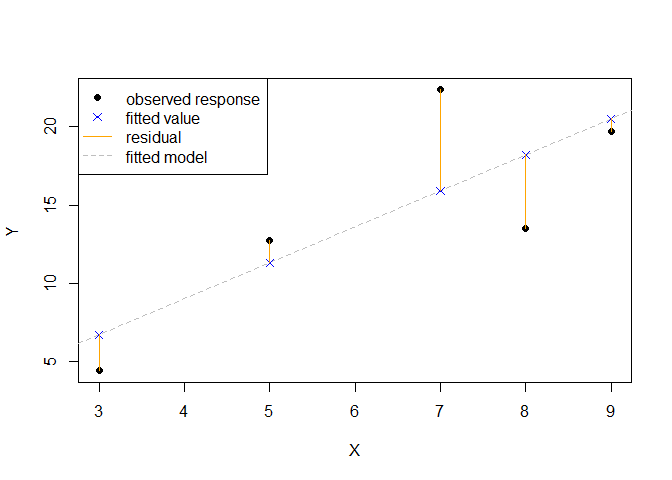

In the graphic above, we visualize the response values, fitted values,
residuals, and fitted model in a simple linear regression context. Note
that:

-   The fitted model is shown as the dashed grey line and minimizes the
    RSS.
-   The response values, shown as black dots, are the observed values of
    $Y$.
-   The fitted values, shown as blue x’s, are the values returned by
    evaluating the fitted model at the observed regressor values.
-   The residuals, shown as solid orange lines, indicate the distance
    and direction between the observed responses and their corresponding
    fitted value. If the response is larger than the fitted value then
    the residual is positive, otherwise it is negative.
-   The RSS is the sum of the squared vertical distances between the
    response and fitted values.

## OLS estimators of the simple linear regression parameters

The estimators of $\beta_0$ and $\beta_1$ that minimize the RSS for a
simple linear regression model can be obtained analytically using basic
calculus (as long as $x_1,\ldots,x_n$ are not all equal to the same
number).

Define:

-   $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$.
-   $\bar{Y} = \frac{1}{n}\sum_{i=1}^n Y_i$.

The OLS estimators of the simple linear regression coefficients that
minimize the RSS are $$
\begin{aligned}
\hat{\beta}_1 &= \frac{\sum_{i=1}^n x_i Y_i - \frac{1}{n} \biggl(\sum_{i=1}^n x_i\biggr)\biggl(\sum_{i=1}^n Y_i\biggr)}{\sum_{i=1}^n x_i^2 - \frac{1}{n} \biggl(\sum_{i=1}^n x_i\biggr)^2} \notag \\
&= \frac{\sum_{i=1}^n (x_i - \bar{x})(Y_i - \bar{Y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \notag \\
&= \frac{\sum_{i=1}^n (x_i - \bar{x})Y_i}{\sum_{i=1}^n (x_i - \bar{x})x_i}
\end{aligned}
$$ and $$
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{x}.
$$

The most common estimator of the error variance is $$
\hat{\sigma}^2 = \frac{RSS}{\mathrm{df}_{RSS}}.
$$

-   $\mathrm{df}_{RSS}$ is the **degrees of freedom** of the RSS.
-   For simply linear regression, $\mathrm{df}_{RSS}=n-2$.

# Penguins simple linear regression example

The `penguins` data set provides data related to various penguin species
measured in the Palmer Archipelago (Antarctica), originally provided by
Gorman et al. (2014). We start by loading the data into memory.

In [ ]:
data(penguins, package = "palmerpenguins")
head(penguins)

# A tibble: 6 × 8
  species island    bill_length_mm bill_depth_mm flipper_l…¹ body_…² sex    year
  <fct>   <fct>              <dbl>         <dbl>       <int>   <int> <fct> <int>
1 Adelie  Torgersen           39.1          18.7         181    3750 male   2007
2 Adelie  Torgersen           39.5          17.4         186    3800 fema…  2007
3 Adelie  Torgersen           40.3          18           195    3250 fema…  2007
4 Adelie  Torgersen           NA            NA            NA      NA <NA>   2007
5 Adelie  Torgersen           36.7          19.3         193    3450 fema…  2007
6 Adelie  Torgersen           39.3          20.6         190    3650 male   2007
# … with abbreviated variable names ¹​flipper_length_mm, ²​body_mass_g

The data set includes 344 observations of 8 variables. The variables
are:

-   `species`: a `factor` indicating the penguin species.
-   `island`: a `factor` indicating the island the penguin was observed.
-   `bill_length_mm`: a `numeric` variable indicating the bill length in
    millimeters.
-   `bill_depth_mm`: a `numeric` variable indicating the bill depth in
    millimeters.
-   `flipper_length_mm`: an `integer` variable indicating the flipper
    length in millimeters
-   `body_mass_g`: an `integer` variable indicating the body mass in
    grams.
-   `sex`: a `factor` indicating the penguin sex (`female`, `male`).
-   `year`: an integer denoting the study year the penguin was observed
    (`2007`, `2008`, or `2009`).

We begin by creating a scatter plot of `bill_length_mm` versus
`body_mass_g`.

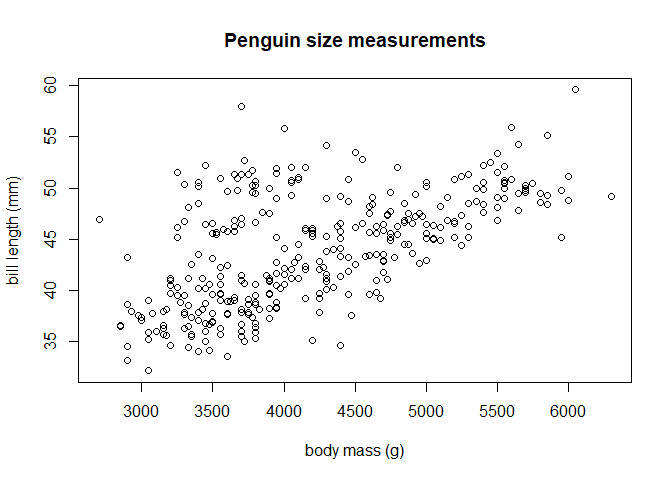

In [ ]:
plot(bill_length_mm ~ body_mass_g, data = penguins,
     ylab = "bill length (mm)", xlab = "body mass (g)",
     main = "Penguin size measurements")

**Questions:**

-   Is there a positive/negative association between body mass and bill
    length?
-   Is the relationship approximately linear?

We will build a simple linear regression model that regresses
`bill_length_mm` on `body_mass_g`.

We want to estimate the parameters of the model $$
E(\mathtt{bill\_length\_mm}\mid \mathtt{body\_mass\_g})=\beta_0+\beta_1\,\mathtt{body\_mass\_g}.
$$

The `lm` function uses OLS estimation to fit a linear model to data. The
function has two main arguments:

-   `data`: the data frame in which the model variables are stored. This
    can be omitted if the variables are already stored in memory.
-   `formula`: a Wilkinson and Rogers (1973) style formula describing
    the linear regression model. For complete details, run
    `?stats:formula` in the Console. If `y` is the response variable and
    `x` is an available numeric predictor, then `formula = y ~ x` tells
    `lm` to fit the simple linear regression model
    $E(Y|X)=\beta_0+\beta_1 X$.

In [ ]:
lmod <- lm(bill_length_mm ~ body_mass_g, data = penguins) # fit model
class(lmod) # class of lmod

[1] "lm"

The `summary` function is commonly used to summarize the results of our
fitted model.

When an `lm` object is supplied to the `summary` function, it returns:

-   `Call`: the function call used to fit the model.
-   `Residuals`: A 5-number summary of the
    $\hat{\epsilon}_1, \ldots, \hat{\epsilon}_n$.
-   `Coefficients`: A table that lists:
    -   The regressors in the fitted model.
    -   `Estimate`: the estimated coefficient for each regressor.
    -   `Std. Error`: the *estimated* standard error of the estimated
        coefficients.
    -   `t value`: the computed test statistic associated with testing
        $H_0: \beta_j = 0$ versus $H_a: \beta_j \neq 0$ for each
        regression coefficient in the model.
    -   `Pr(>|t|)`: the associated p-value of each test.
-   Various summary statistics:
    -   `Residual standard error` is the value of $\hat{\sigma}$, the
        estimate of the error standard deviation. The degrees of freedom
        is $\mathrm{df}_{RSS}$, the number of observations minus the
        number of estimated coefficients in the model.
    -   `Multiple R-squared` is an estimate of model fit.
    -   `Adjusted R-squared` is a modified version of
        `Multiple R-squared`.
    -   `F-statistic` is the test statistic for the test that compares
        the model with an only an intercept to the fitted model. The
        `DF` (degrees of freedom) values relate to the statistic under
        the null hypothesis, and the `p-value` is the p-value for the
        test.

We use the `summary` function on `lmod` to produce the output below.

In [ ]:
# summarize results stored in lmod
summary(lmod)


Call:
lm(formula = bill_length_mm ~ body_mass_g, data = penguins)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1251  -3.0434  -0.8089   2.0711  16.1109 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.690e+01  1.269e+00   21.19   <2e-16 ***
body_mass_g 4.051e-03  2.967e-04   13.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.394 on 340 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.3542,    Adjusted R-squared:  0.3523 
F-statistic: 186.4 on 1 and 340 DF,  p-value: < 2.2e-16

Using the output above, we see that the estimated parameters are
$\hat{\beta}_0=26.9$ and $\hat{\beta}_1=0.004$.

Our fitted model is $$
\widehat{\mathtt{bill\_length\_mm}}=26.9+0.004 \,\mathtt{body\_mass\_g}.
$$

In the context of a simple linear regression model:

-   The intercept term is the expected response when the value of the
    regressor is zero.
-   The slope is the expected change in the response when the regressor
    increases by 1 unit.

Thus, based on the model we fit to the `penguins` data, we can make the
following interpretations:

-   $\hat{\beta}_1$: If a penguin has a body mass 1 gram larger than
    another penguin, we expect the larger penguin’s bill length to be
    0.004 millimeters longer.

-   $\hat{\beta}_0$: A penguin with a body mass of 0 grams is expected
    to have a bill length of 26.9 millimeters.

-   **Question:** Does the intercept term make sense physically?

The `abline` function can be used to automatically overlay the fitted
model on the observed data.

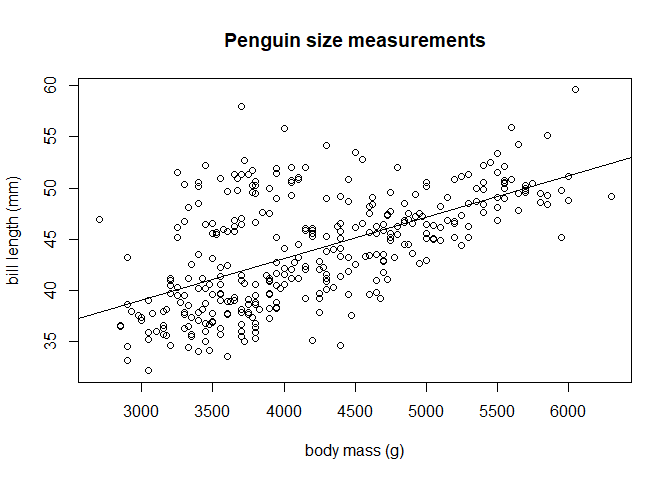

In [ ]:
plot(bill_length_mm ~ body_mass_g,
     data = penguins, main = "Penguin size measurements",
     ylab = "bill length (mm)", xlab = "body mass (g)")
# draw fitted line of plot
abline(lmod)

R provides many additional methods (generic functions that do something
specific when applied to a certain type of object) for `lm` objects.
Commonly used ones include:

In [ ]:
(coeffs <- coef(lmod)) # extract, assign, and print coefficients

 (Intercept)  body_mass_g 
26.898872424  0.004051417 

         1          2          3          5          6          7 
-2.9916846 -2.7942554  0.2340237 -4.1762596 -2.3865430 -2.6852575 

       1        2        3        5        6        7 
42.09168 42.29426 40.06598 40.87626 41.68654 41.58526 

       1        2        3        5        6        7 
42.09168 42.29426 40.06598 40.87626 41.68654 41.58526 

[1] 6564.494

[1] 340

[1] 19.30734

**Question:**

-   What is the RSS of the fitted model?

–\>

–\> <!-- <!-- \[ --> –\> <!-- <!-- \begin{align} --> –\>
<!-- <!-- \mathrm{var}(Y_i\mid X = x_i) &= \mathrm{var}(\beta_0+\beta_1x_i+\epsilon_i\mid X = x_i)&\tiny\text{(substitute model definition)} \\ -->
–\>
<!-- <!-- &= \mathrm{var}(\epsilon_i\mid X = x_i)&\tiny(\beta_0, \beta_1, x_i\text{ are fixed, so zero variance)} \\ -->
–\> <!-- <!-- &= \sigma^2. &\tiny\text{(by assumption)} --> –\>
<!-- <!-- \end{align} --> –\> <!-- <!-- \] --> –\>

–\> <!-- <!-- \[ --> –\> <!-- <!-- \begin{align} --> –\>
<!-- <!-- \text{cov}(Y_i, Y_j\mid \mathbf{X}) &= \text{cov}(\beta_0+\beta_1x_i+\epsilon_i, \beta_0+\beta_1x_j+\epsilon_j\mid \mathbf{X})&\tiny\text{(substitute model definition)} \\ -->
–\>
<!-- <!-- &= \text{cov}(\epsilon_i,\epsilon_j\mid \mathbf{X})&\tiny\text{(other values are fixed)} \\ -->
–\> <!-- <!-- &= 0.&\tiny\text{(errors are uncorrelated)} --> –\>
<!-- <!-- \end{align} --> –\> <!-- <!-- \] --> –\>

–\> <!-- <!-- \[ --> –\> <!-- <!-- \begin{align} --> –\>
<!-- <!-- \mathrm{var}(\hat\beta_1\mid \mathbf{X}) &=\mathrm{var}\left(\frac{\sum(x_i-\bar x)Y_i}{\sum(x_i-\bar x)^2}\mid \mathbf{X}\right)&\tiny\text{(expression for }\hat\beta_1)\\ -->
–\>
<!-- <!-- &=\frac{1}{\left[\sum(x_i-\bar x)^2\right]^2}\mathrm{var}\left(\sum(x_i-\bar x)Y_i\Bigm| \mathbf{X}\right)&\tiny\text{(factor out constant denominator)}\\ -->
–\>
<!-- <!-- &=\frac{1}{\left[\sum(x_i-\bar x)^2\right]^2}\biggl[\sum\mathrm{var}((x_i-\bar x)Y_i\mid \mathbf{X})&\\ -->
–\>
<!-- <!-- &\qquad+\sum_{i=1}^{n}\sum_{i\neq j}\text{cov}((x_i-\bar x)Y_i, (x_j-\bar x)Y_j\mid \mathbf{X})\biggr]&\tiny\text{(variance of a sum formula)}\\ -->
–\>
<!-- <!-- &=\frac{1}{\left[\sum(x_i-\bar x)^2\right]^2}\biggl[\sum(x_i-\bar x)^2\mathrm{var}(Y_i\mid \mathbf{X}) & \\ -->
–\>
<!-- <!-- &\qquad +\sum_{i=1}^{n}\sum_{i\neq j}(x_i-\bar x)(x_j-\bar x)\text{cov}(Y_i,Y_j\mid \mathbf{X})\biggr]&\tiny\text{(factor out constants)}\\ -->
–\>
<!-- <!-- &=\frac{1}{\left[\sum(x_i-\bar x)^2\right]^2}\left[\sum(x_i-\bar x)^2\mathrm{var}(Y_i\mid \mathbf{X})\right]&\tiny\text{(simplify using }\text{cov}(Y_i, Y_j\mid \mathbf{X})=0 \text{ for } i\neq j)\\ -->
–\>
<!-- <!-- &=\frac{1}{\left[\sum(x_i-\bar x)^2\right]^2}\left[\sigma^2\sum(x_i-\bar x)^2\right]&\tiny\text{(substitute known variance, factor out }\sigma^2\text{)}\\ -->
–\>
<!-- <!-- &=\frac{\sigma^2}{\sum(x_i-\bar x)^2}.&\tiny\text{(cancel out numerator and denominator)}\ -->
–\> <!-- <!-- \end{align} --> –\> <!-- <!-- \] --> –\>

# References

Anscombe, Francis J. 1973. “Graphs in Statistical Analysis.” The
American Statistician 27 (1): 17–21.

Ezekiel, Mordecai. 1930. “Methods of Correlation Analysis.”

Gorman, Kristen B., Tony D. Williams, and William R. Fraser. 2014.
“Ecological Sexual Dimorphism and Environmental Variability Within a
Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE 9 (3):
1–14. https://doi.org/10.1371/journal.pone.0090081.

Weisberg, Sanford. 2014. Applied Linear Regression. Fourth. Hoboken NJ:
Wiley. http://z.umn.edu/alr4ed.

Wilkinson, GN, and CE Rogers. 1973. “Symbolic Description of Factorial
Models for Analysis of Variance.” Journal of the Royal Statistical
Society: Series C (Applied Statistics) 22 (3): 392–99.